In [1]:
import operator
import numpy as np
import statsmodels.api as sm
from statsmodels import regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
df1 = pd.DataFrame ({'Salary': [135000, 260000, 105000, 220000, 240000, 265000, 270000, 300000, 265000, 105000],
                     'Age': [25,55,27,35,60,65,45,40,50,30]})
df1

,Salary,Age
0,135000,25
1,260000,55
2,105000,27
3,220000,35
4,240000,60
5,265000,65
6,270000,45
7,300000,40
8,265000,50
9,105000,30


In [3]:
X = df1.loc[: , df1.columns == 'Age']

In [4]:
X1 = df1.loc[: , df1.columns != 'Salary']
y1 = df1.loc[: , df1.columns == 'Salary']

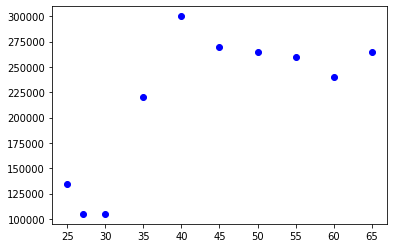

In [5]:
plt.scatter(X1,y1, color='blue')

# Linear Regression (Polynomial of degree 1)

## Train the model

In [6]:
X11 = sm.add_constant(X1)
model = sm.OLS(y1,X11)
result= model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     9.432
Date:                Sun, 31 May 2020   Prob (F-statistic):             0.0153
Time:                        23:49:19   Log-Likelihood:                -121.81
No. Observations:                  10   AIC:                             247.6
Df Residuals:                       8   BIC:                             248.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.116e+04   5.64e+04      0.908      0.3

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [7]:
Parameters = pd.DataFrame(result.params,columns={'Parameters'},)
Parameters

,Parameters
const,51160.415271
Age,3827.305202


In [8]:
a = round(float(Parameters.iloc[0]),2)
b = round(float(Parameters.iloc[1]),2)

In [9]:
print("The equation is: Salary =",a,"+",b,"* Age" )

The equation is: Salary = 51160.42 + 3827.31 * Age


In [10]:
lr = LinearRegression()
X1= np.array(X1).reshape(-1,1)
lr_model1 = lr.fit(X1,y1)

## Prediction

In [11]:
y1_pred = lr_model1.predict(X1)

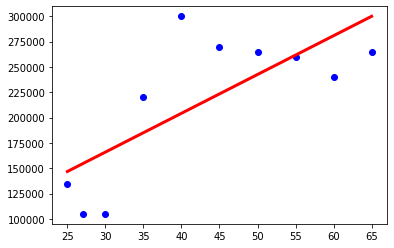

In [12]:
import numpy
import matplotlib.pyplot as plt
mymodel = numpy.poly1d(numpy.polyfit(df1.Age, df1.Salary, 1))
myline = numpy.linspace(25, 65, 100)
plt.scatter(df1.Age, df1.Salary, color='blue')
plt.plot(myline, mymodel(myline),color='red',linewidth = 3.0)
plt.show()

## Conclusion

In [13]:
rsqu1=lr.score(X1,y1)
print("R squared of linear regression:", "{:.2%}".format(rsqu1))
rmse1=np.sqrt(mean_squared_error(y1,y1_pred))
print("RMSE of linear regression:", "{:,.2f}".format(rmse1))

R squared of linear regression: 54.11%
RMSE of linear regression: 47,179.09


# Polynomial of degree 2

In [14]:
df1['Age^2']=df1['Age']**2
df2 = pd.DataFrame({'Salary': df1.Salary, 'Age': df1.Age, 'Age^2' : df1['Age^2']})
df2

,Salary,Age,Age^2
0,135000,25,625
1,260000,55,3025
2,105000,27,729
3,220000,35,1225
4,240000,60,3600
5,265000,65,4225
6,270000,45,2025
7,300000,40,1600
8,265000,50,2500
9,105000,30,900


In [15]:
X2 = df2.loc[: , df2.columns != 'Salary']
y2 = df2.loc[: , df2.columns == 'Salary']

## Train the model

In [16]:
X21 = sm.add_constant(X2)
model = sm.OLS(y2,X21)
result= model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     13.89
Date:                Sun, 31 May 2020   Prob (F-statistic):            0.00366
Time:                        23:49:20   Log-Likelihood:                -117.68
No. Observations:                  10   AIC:                             241.4
Df Residuals:                       7   BIC:                             242.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.822e+05    1.5e+05     -2.545      0.0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [17]:
Parameters = pd.DataFrame(result.params,columns={'Parameters'},)
Parameters

,Parameters
const,-382171.111545
Age,25377.166571
Age^2,-243.288591


In [18]:
a = round(float(Parameters.iloc[0]),2)
b = round(float(Parameters.iloc[1]),2)
c = round(float(Parameters.iloc[2]),2)

In [19]:
print("The equation is: Salary =",a,"+",b,"* Age +",c,"* Age^2")

The equation is: Salary = -382171.11 + 25377.17 * Age + -243.29 * Age^2


In [20]:
X2 = df2.loc[: , df2.columns != 'Salary']
X2= np.array(X2)
lr_model2 = lr.fit(X2,y2)

## Prediction

In [21]:
y2_pred = lr_model2.predict(X2)

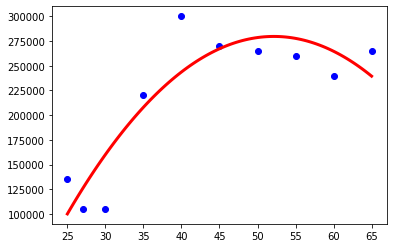

In [22]:
import numpy
import matplotlib.pyplot as plt
mymodel = numpy.poly1d(numpy.polyfit(df1.Age, df1.Salary, 2))
myline = numpy.linspace(25, 65, 100)
plt.scatter(df1.Age, df1.Salary, color='blue')
plt.plot(myline, mymodel(myline),color='red',linewidth = 3.0)
plt.show()

## Conclusion

In [23]:
rsqu2=lr.score(X2,y2)
print("R squared of polynomial of degree 2:", "{:.2%}".format(rsqu2))
rmse2=np.sqrt(mean_squared_error(y2,y2_pred))
print("RMSE of polynomial of degree 2:", "{:,.2f}".format(rmse2))

R squared of polynomial of degree 2: 79.88%
RMSE of polynomial of degree 2: 31,242.12


# Polynomial of degree 3

In [24]:
df2['Age^3']=df2['Age']**3
df3 = pd.DataFrame({'Salary': df2.Salary, 'Age': df2.Age, 'Age^2' : df2['Age^2'], 'Age^3' : df2['Age^3']})
df3

,Salary,Age,Age^2,Age^3
0,135000,25,625,15625
1,260000,55,3025,166375
2,105000,27,729,19683
3,220000,35,1225,42875
4,240000,60,3600,216000
5,265000,65,4225,274625
6,270000,45,2025,91125
7,300000,40,1600,64000
8,265000,50,2500,125000
9,105000,30,900,27000


In [25]:
X3 = df3.loc[: , df3.columns != 'Salary']
y3 = df3.loc[: , df3.columns == 'Salary']

## Train the model

In [26]:
X31 = sm.add_constant(X3)
model = sm.OLS(y3,X31)
result= model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     8.533
Date:                Sun, 31 May 2020   Prob (F-statistic):             0.0139
Time:                        23:49:20   Log-Likelihood:                -117.39
No. Observations:                  10   AIC:                             242.8
Df Residuals:                       6   BIC:                             244.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -7.64e+05   6.56e+05     -1.164      0.2

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [27]:
Parameters = pd.DataFrame(result.params,columns={'Parameters'},)
Parameters

,Parameters
const,-763999.774329
Age,53860.384386
Age^2,-910.652169
Age^3,4.954189


In [28]:
a = round(float(Parameters.iloc[0]),2)
b = round(float(Parameters.iloc[1]),2)
c = round(float(Parameters.iloc[2]),2)
d = round(float(Parameters.iloc[3]),2)

In [29]:
print("The equation is: Salary =",a,"+",b,"* Age +",c,"* Age^2 +",d,"* Age^3")

The equation is: Salary = -763999.77 + 53860.38 * Age + -910.65 * Age^2 + 4.95 * Age^3


In [30]:
X3 = df3.loc[: , df3.columns != 'Salary']
X3= np.array(X3)
lr_model3 = lr.fit(X3,y3)

## Prediction

In [31]:
y3_pred = lr_model3.predict(X3)

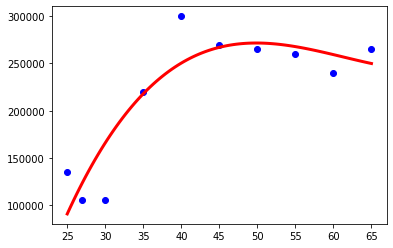

In [32]:
import numpy
import matplotlib.pyplot as plt
mymodel = numpy.poly1d(numpy.polyfit(df1.Age, df1.Salary, 3))
myline = numpy.linspace(25, 65, 100)
plt.scatter(df1.Age, df1.Salary, color='blue')
plt.plot(myline, mymodel(myline),color='red',linewidth = 3.0)
plt.show()

## Conclusion

In [33]:
rsqu3=lr.score(X3,y3)
print("R squared of polynomial of degree 3:", "{:.2%}".format(rsqu3))
rmse3=np.sqrt(mean_squared_error(y3,y3_pred))
print("RMSE of polynomial of degree 3:", "{:,.2f}".format(rmse3))

R squared of polynomial of degree 3: 81.01%
RMSE of polynomial of degree 3: 30,346.97


# Polynomial of degree 4

In [34]:
df3['Age^4']=df3['Age']**4
df4 = pd.DataFrame({'Salary': df3.Salary, 'Age': df3.Age, 'Age^2' : df3['Age^2'], 'Age^3' : df3['Age^3'], 'Age^4' : df3['Age^4']})
df4

,Salary,Age,Age^2,Age^3,Age^4
0,135000,25,625,15625,390625
1,260000,55,3025,166375,9150625
2,105000,27,729,19683,531441
3,220000,35,1225,42875,1500625
4,240000,60,3600,216000,12960000
5,265000,65,4225,274625,17850625
6,270000,45,2025,91125,4100625
7,300000,40,1600,64000,2560000
8,265000,50,2500,125000,6250000
9,105000,30,900,27000,810000


In [35]:
X4 = df4.loc[: , df4.columns != 'Salary']
y4 = df4.loc[: , df4.columns == 'Salary']

## Train the model

In [36]:
X41 = sm.add_constant(X4)
model = sm.OLS(y4,X41)
result= model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     12.89
Date:                Sun, 31 May 2020   Prob (F-statistic):            0.00761
Time:                        23:49:20   Log-Likelihood:                -113.57
No. Observations:                  10   AIC:                             237.1
Df Residuals:                       5   BIC:                             238.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.029e+06   2.06e+06      1.956      0.1

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [37]:
Parameters = pd.DataFrame(result.params,columns={'Parameters'},)
Parameters

,Parameters
const,4.028745e+06
Age,-4.220042e+05
Age^2,1.611071e+04
Age^3,-2.557099e+02
Age^4,1.447003e+00


In [38]:
a = round(float(Parameters.iloc[0]),2)
b = round(float(Parameters.iloc[1]),2)
c = round(float(Parameters.iloc[2]),2)
d = round(float(Parameters.iloc[3]),2)
e = round(float(Parameters.iloc[4]),2)

In [39]:
print("The equation is: Salary =",a,"+",b,"* Age +",c,"* Age^2 +",d,"* Age^3 +",e,"* Age^4")

The equation is: Salary = 4028744.57 + -422004.17 * Age + 16110.71 * Age^2 + -255.71 * Age^3 + 1.45 * Age^4


In [40]:
X4 = df4.loc[: , df4.columns != 'Salary']
X4= np.array(X4)
lr_model4 = lr.fit(X4,y4)

## Prediction

In [41]:
y4_pred = lr_model4.predict(X4)

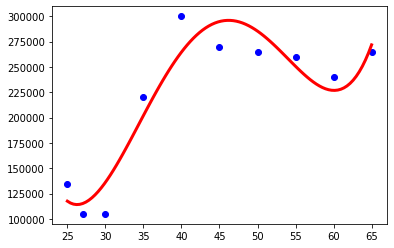

In [42]:
import numpy
import matplotlib.pyplot as plt
mymodel = numpy.poly1d(numpy.polyfit(df1.Age, df1.Salary, 4))
myline = numpy.linspace(25, 65, 100)
plt.scatter(df1.Age, df1.Salary, color='blue')
plt.plot(myline, mymodel(myline),color='red',linewidth = 3.0)
plt.show()

## Conclusion

In [43]:
rsqu4=lr.score(X4,y4)
print("R squared of polynomial of degree 4:", "{:.2%}".format(rsqu4))
rmse4=np.sqrt(mean_squared_error(y4,y4_pred))
print("RMSE of polynomial of degree 4:", "{:,.2f}".format(rmse4))

R squared of polynomial of degree 4: 91.16%
RMSE of polynomial of degree 4: 20,704.20


# Polynomial of degree 5

In [44]:
df4['Age^5']=df4['Age']**5
df5 = pd.DataFrame({'Salary': df4.Salary, 'Age': df4.Age, 'Age^2' : df4['Age^2'], 'Age^3' : df4['Age^3'], 'Age^4' : df4['Age^4'], 'Age^5' : df4['Age^5']})
df5

,Salary,Age,Age^2,Age^3,Age^4,Age^5
0,135000,25,625,15625,390625,9765625
1,260000,55,3025,166375,9150625,503284375
2,105000,27,729,19683,531441,14348907
3,220000,35,1225,42875,1500625,52521875
4,240000,60,3600,216000,12960000,777600000
5,265000,65,4225,274625,17850625,1160290625
6,270000,45,2025,91125,4100625,184528125
7,300000,40,1600,64000,2560000,102400000
8,265000,50,2500,125000,6250000,312500000
9,105000,30,900,27000,810000,24300000


In [45]:
X5 = df5.loc[: , df5.columns != 'Salary']
y5 = df5.loc[: , df5.columns == 'Salary']

## Train the model

In [46]:
X51 = sm.add_constant(X5)
model = sm.OLS(y5,X51)
result= model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     25.10
Date:                Sun, 31 May 2020   Prob (F-statistic):            0.00405
Time:                        23:49:21   Log-Likelihood:                -108.31
No. Observations:                  10   AIC:                             228.6
Df Residuals:                       4   BIC:                             230.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.92e+07   5.72e+06      3.354      0.0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [47]:
Parameters = pd.DataFrame(result.params,columns={'Parameters'},)
Parameters

,Parameters
const,1.919842e+07
Age,-2.312166e+06
Age^2,1.075395e+05
Age^3,-2.403642e+03
Age^4,2.599259e+01
Age^5,-1.093551e-01


In [48]:
a = round(float(Parameters.iloc[0]),2)
b = round(float(Parameters.iloc[1]),2)
c = round(float(Parameters.iloc[2]),2)
d = round(float(Parameters.iloc[3]),2)
e = round(float(Parameters.iloc[4]),2)
f = round(float(Parameters.iloc[5]),2)

In [49]:
print("The equation is: Salary =",a,"+",b,"* Age +",c,"* Age^2 +",d,"* Age^3 +",e,"* Age^4 +",f,"* Age^5")

The equation is: Salary = 19198421.05 + -2312165.6 * Age + 107539.45 * Age^2 + -2403.64 * Age^3 + 25.99 * Age^4 + -0.11 * Age^5


In [50]:
X5 = df5.loc[: , df5.columns != 'Salary']
X5= np.array(X5)
lr_model5 = lr.fit(X5,y5)

## Prediction

In [51]:
y5_pred = lr_model5.predict(X5)

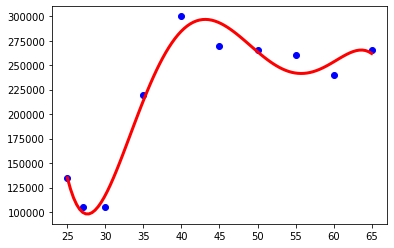

In [52]:
import numpy
import matplotlib.pyplot as plt
mymodel = numpy.poly1d(numpy.polyfit(df1.Age, df1.Salary, 5))
myline = numpy.linspace(25, 65, 100)
plt.scatter(df1.Age, df1.Salary, color='blue')
plt.plot(myline, mymodel(myline),color='red',linewidth = 3.0)
plt.show()

## Conclusion

In [53]:
rsqu5=lr.score(X5,y5)
print("R squared of polynomial of degree 5:", "{:.2%}".format(rsqu5))
rmse5=np.sqrt(mean_squared_error(y5,y5_pred))
print("RMSE of polynomial of degree 5:", "{:,.2f}".format(rmse5))

R squared of polynomial of degree 5: 96.91%
RMSE of polynomial of degree 5: 12,240.10


# Polynomial of degree 10

In [54]:
df5['Age^6']=df5['Age']**6
df5['Age^7']=df5['Age']**7
df5['Age^8']=df5['Age']**8
df5['Age^9']=df5['Age']**9
df5['Age^10']=df5['Age']**10
df10 = pd.DataFrame({'Salary': df5.Salary, 'Age': df5.Age, 'Age^2' : df5['Age^2'], 'Age^3' : df5['Age^3'],
                     'Age^4' : df5['Age^4'], 'Age^5' : df5['Age^5'], 'Age^6' : df5['Age^6'], 'Age^7' : df5['Age^7'],
                     'Age^8' : df5['Age^8'], 'Age^9' : df5['Age^9'], 'Age^10' : df5['Age^10']})
df10

,Salary,Age,Age^2,Age^3,Age^4,Age^5,Age^6,Age^7,Age^8,Age^9,Age^10
0,135000,25,625,15625,390625,9765625,244140625,6103515625,152587890625,3814697265625,95367431640625
1,260000,55,3025,166375,9150625,503284375,27680640625,1522435234375,83733937890625,4605366583984375,253295162119140625
2,105000,27,729,19683,531441,14348907,387420489,10460353203,282429536481,7625597484987,205891132094649
3,220000,35,1225,42875,1500625,52521875,1838265625,64339296875,2251875390625,78815638671875,2758547353515625
4,240000,60,3600,216000,12960000,777600000,46656000000,2799360000000,167961600000000,10077696000000000,604661760000000000
5,265000,65,4225,274625,17850625,1160290625,75418890625,4902227890625,318644812890625,20711912837890625,1346274334462890625
6,270000,45,2025,91125,4100625,184528125,8303765625,373669453125,16815125390625,756680642578125,34050628916015625
7,300000,40,1600,64000,2560000,102400000,4096000000,163840000000,6553600000000,262144000000000,10485760000000000
8,265000,50,2500,125000,6250000,312500000,15625000000,781250000000,39062500000000,1953125000000000,97656250000000000
9,105000,30,900,27000,810000,24300000,729000000,21870000000,656100000000,19683000000000,590490000000000


In [55]:
X10 = df10.loc[: , df10.columns != 'Salary']
y10 = df10.loc[: , df10.columns == 'Salary']

## Train the model

In [56]:
X101 = sm.add_constant(X10)
model = sm.OLS(y10,X101)
result= model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     5.696
Date:                Sun, 31 May 2020   Prob (F-statistic):             0.0584
Time:                        23:49:21   Log-Likelihood:                -115.23
No. Observations:                  10   AIC:                             242.5
Df Residuals:                       4   BIC:                             244.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.269e-07   1.09e-06      0.301      0.7

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [57]:
Parameters = pd.DataFrame(result.params,columns={'Parameters'},)
Parameters

,Parameters
const,3.269261e-07
Age,2.104718e-06
Age^2,3.825864e-05
Age^3,5.997738e-04
Age^4,7.297589e-03
Age^5,5.262767e-02
Age^6,-3.495230e-03
Age^7,1.065298e-04
Age^8,-1.876274e-06
Age^9,1.835455e-08


In [58]:
a = round(float(Parameters.iloc[0]),5)
b = round(float(Parameters.iloc[1]),5)
c = round(float(Parameters.iloc[2]),5)
d = round(float(Parameters.iloc[3]),5)
e = round(float(Parameters.iloc[4]),5)
f = round(float(Parameters.iloc[5]),5)
g = round(float(Parameters.iloc[6]),5)
h = round(float(Parameters.iloc[7]),5)
i = round(float(Parameters.iloc[8]),5)
j = round(float(Parameters.iloc[9]),5)
k = round(float(Parameters.iloc[10]),5)

In [59]:
print("The equation is: Salary =",a,"+",b,"* Age +",c,"* Age^2 +",d,"* Age^3 +",e,"* Age^4",f,"* Age^5",g,"* Age^6 +",h,"* Age^7 +",i,"* Age^8 +",j,"* Age^9",k,"* Age^10")

The equation is: Salary = 0.0 + 0.0 * Age + 4e-05 * Age^2 + 0.0006 * Age^3 + 0.0073 * Age^4 0.05263 * Age^5 -0.0035 * Age^6 + 0.00011 * Age^7 + -0.0 * Age^8 + 0.0 * Age^9 -0.0 * Age^10


In [60]:
X10 = df10.loc[: , df10.columns != 'Salary']
X10= np.array(X10)
lr_model10 = lr.fit(X10,y10)

## Prediction

In [61]:
y10_pred = lr_model10.predict(X10)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3319: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


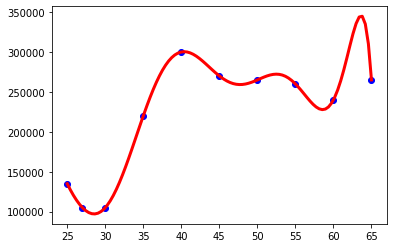

In [62]:
import numpy
import matplotlib.pyplot as plt
mymodel = numpy.poly1d(numpy.polyfit(df1.Age, df1.Salary, 10))
myline = numpy.linspace(25, 65, 100)
plt.scatter(df1.Age, df1.Salary, color='blue')
plt.plot(myline, mymodel(myline),color='red',linewidth = 3.0)
plt.show()

## Conclusion

In [63]:
rsqu10=lr.score(X10,y10)
print("R squared of polynomial of degree 10:", "{:.2%}".format(rsqu10))
rmse10=np.sqrt(mean_squared_error(y10,y10_pred))
print("RMSE of polynomial of degree 10:", "{:,.2f}".format(rmse10))

R squared of polynomial of degree 10: 98.36%
RMSE of polynomial of degree 10: 8,920.77


# Final conclusion

## By R squared

In [64]:
print("R squared of of Linear Regression:", "{:,.2f}".format(rsqu1))
print("R squared of polynomial of degree 2:", "{:,.2f}".format(rsqu2))
print("R squared of polynomial of degree 3:", "{:,.2f}".format(rsqu3))
print("R squared of polynomial of degree 4:", "{:,.2f}".format(rsqu4))
print("R squared of polynomial of degree 5:", "{:,.2f}".format(rsqu5))
print("R squared of polynomial of degree 10:", "{:,.2f}".format(rsqu10))

R squared of of Linear Regression: 0.54
R squared of polynomial of degree 2: 0.80
R squared of polynomial of degree 3: 0.81
R squared of polynomial of degree 4: 0.91
R squared of polynomial of degree 5: 0.97
R squared of polynomial of degree 10: 0.98


__Hence polynomial of degree 10 model is selected for the prediction of annual salary using the features__

## By RMSE score

In [65]:
print("RMSE of Linear Regression:", "{:,.2f}".format(rmse1))
print("RMSE of polynomial of degree 2:", "{:,.2f}".format(rmse2))
print("RMSE of polynomial of degree 3:", "{:,.2f}".format(rmse3))
print("RMSE of polynomial of degree 4:", "{:,.2f}".format(rmse4))
print("RMSE of polynomial of degree 5:", "{:,.2f}".format(rmse5))
print("RMSE of polynomial of degree 5:", "{:,.2f}".format(rmse10))

RMSE of Linear Regression: 47,179.09
RMSE of polynomial of degree 2: 31,242.12
RMSE of polynomial of degree 3: 30,346.97
RMSE of polynomial of degree 4: 20,704.20
RMSE of polynomial of degree 5: 12,240.10
RMSE of polynomial of degree 5: 8,920.77


__Hence polynomial of degree 10 model is selected for the prediction of annual salary using the features__

# Real time prediction

In [66]:
a = int(input("Please enter age:"))
b, c, d, e, f, g, h, i, j = a**2, a**3, a**4, a**5, a**6, a**7, a**8, a**9, a**10
new_data = np.array([a,b,c,d,e,f,g,h,i,j]).reshape(1,-1)
new_pred=lr_model10.predict(new_data)
print("\033[1m The estimated annual salary of that person is : $ \033[1m ","{:,.2f}".format(int(new_pred[0])))

Please enter age:25
 The estimated annual salary of that person is : $   131,702.00
